In [1]:
#Import libraries
import numpy as np
import rasterio

import matplotlib.pyplot as plt
from mpl_toolkits.axes_gridl import make_axes_locatable

ModuleNotFoundError: No module named 'mpl_toolkits.axes_gridl'

In [3]:
src = rasterio.open('data/landsat/rgb.tif')
src

<open DatasetReader name='data/landsat/rgb.tif' mode='r'>

In [4]:
print("Number of bands:", src.count)

Number of bands: 3


In [5]:
print("Image width:", src.width)
print("Image height:", src.height)

Image width: 1208
Image height: 1422


In [6]:
src.bounds

BoundingBox(left=391695.0, bottom=4837905.0, right=427935.0, top=4880565.0)

In [7]:
src.transform

Affine(30.0, 0.0, 391695.0,
       0.0, -30.0, 4880565.0)

In [8]:
src.crs

CRS.from_epsg(32610)

In [9]:
#Read data in dataset object
srtm = src.read(1)

In [10]:
srtm

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 29, 30, 29],
       [ 0,  0,  0, ..., 30, 30, 29],
       [ 0,  0,  0, ..., 30, 29, 29]], dtype=uint8)

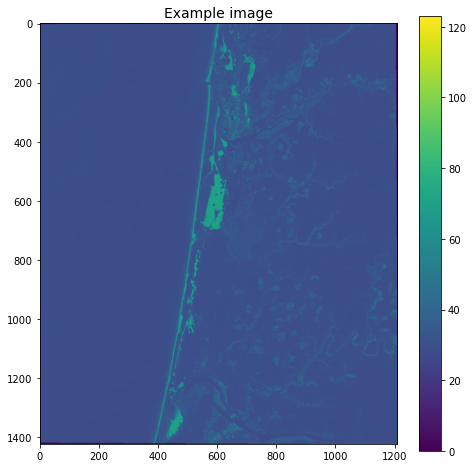

In [18]:
#Plot data
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(srtm)
ax.set_title("Example image", fontsize = 14)
cbar = fig.colorbar(im, orientation="vertical")

In [19]:
!gdalwarp -t_srs EPSG:32610 data/landsat/rgb.tif data/landsat/rgb_utm.tif

Creating output file that is 1208P x 1422L.
Processing data/landsat/rgb.tif [1/1] : 0Using internal nodata values (e.g. 0) for image data/landsat/rgb.tif.
Copying nodata values from source data/landsat/rgb.tif to destination data/landsat/rgb_utm.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [26]:
src = rasterio.open('data/landsat/rgb_utm.tif')
src.crs

CRS.from_epsg(32610)

In [27]:
#Read data in dataset object
srtm = src.read(1)
srtm

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 29, 30, 29],
       [ 0,  0,  0, ..., 30, 30, 29],
       [ 0,  0,  0, ..., 30, 29, 29]], dtype=uint8)

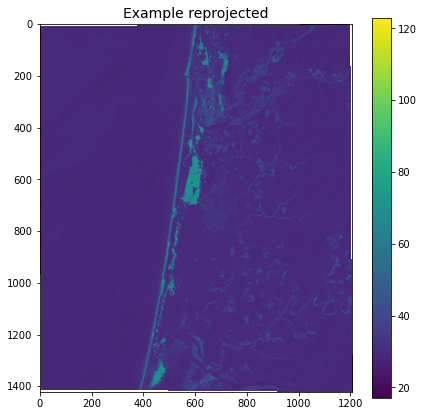

In [28]:
# Make NoData mask
srtm_masked = np.ma.masked_array(srtm, mask =  (srtm == 0))

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(srtm_masked)

ax.set_title("Example reprojected", fontsize = 14)
cbar = fig.colorbar(im, orientation='vertical')

In [32]:
!gdalwarp -tr 1000 -1000 data/landsat/rgb.tif data/landsat/rgb_1000reproj.tif

Creating output file that is 36P x 43L.
Processing data/landsat/rgb.tif [1/1] : 0Using internal nodata values (e.g. 0) for image data/landsat/rgb.tif.
Copying nodata values from source data/landsat/rgb.tif to destination data/landsat/rgb_1000reproj.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [33]:
src = rasterio.open('data/landsat/rgb_1000reproj.tif')
src.crs

CRS.from_epsg(32610)

In [34]:
#Read data in dataset object
srtm = src.read(1)
srtm

array([[30, 30, 30, ..., 29, 29, 29],
       [30, 30, 29, ..., 29, 30, 30],
       [30, 29, 29, ..., 29, 30, 30],
       ...,
       [29, 30, 30, ..., 30, 30, 29],
       [29, 29, 29, ..., 29, 29, 30],
       [29, 29, 30, ..., 29, 29, 32]], dtype=uint8)

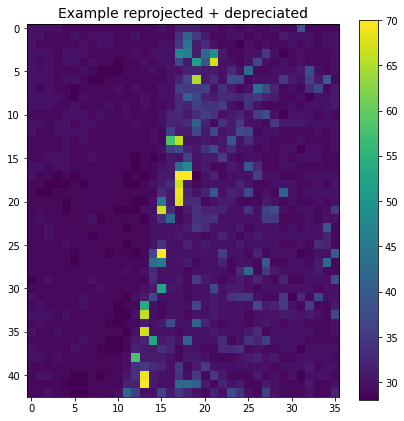

In [35]:
# Make NoData mask
srtm_masked = np.ma.masked_array(srtm, mask =  (srtm == 0))

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(srtm_masked)

ax.set_title("Example reprojected + depreciated", fontsize = 14)
cbar = fig.colorbar(im, orientation='vertical')

In [36]:
#import library
import xarray as xr

In [37]:
# read data
xds = xr.open_dataset('data/era/usa_t2m_tcc_2020.nc')